# 타이타닉 생존자 예측을 위한 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 수집

### 1-1. 경로 설정

In [2]:
DATA_DIR = "../data/titanic"
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [3]:
data_files = sorted([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)], reverse=True)
print(data_files)

['../data/titanic/train.csv', '../data/titanic/test.csv']


### 1-2. DataFrame Load

In [4]:
# DataFrame List 생성
df_list = []
for filename in data_files:
	df_list.append(pd.read_csv(filename))

# DataFrame 병합
df = pd.concat(df_list, sort=False)
# 인덱스 다시 매김
df = df.reset_index(drop=True)

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 2. 데이터 가공

### 2-1. y 데이터 추출

In [5]:
# 컬럼명이 Python 변수명 규칙을 만족하면 df["Survived"]하지 않아도 됨.

# train.csv 데이터 수
number_of_train_dataset = df.Survived.notnull().sum()
number_of_test_dataset = df.Survived.isnull().sum()

print(number_of_train_dataset)
print(number_of_test_dataset)

# train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]
print(len(y_true))

891
418
891


### 2-2. 데이터 형식 확인

In [6]:
# 데이터를 가로로 확인 가능
display(df.head(2).T)
print(df.dtypes)

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 3. 데이터 결측치 처리

### 3-1. 결측치 확인

In [7]:
# pd.options.display.float_format = "{:.2f}".format

df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

### 3-2. 나이 결측치 처리

In [8]:
df["Age"].fillna(
	df.groupby("Pclass")["Age"].transform("mean"),
	inplace=True
)

df.isnull().sum() / len(df) * 100

/tmp/ipykernel_881/1117438557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(


PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

### 3-3. 승선지 결측치 처리

In [9]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

## 4. 범주형 데이터 처리

### 4-1. 데이터 타입 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### 4-2. 데이터 타입 정리

In [11]:
# 컬럼 분류
object_columns = ["PassengerId", "Pclass", "Name",
                  "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

# Object 타입으로 변환
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

# Float 타입으로 변환
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)


# 필요시 정수형으로 변환
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

### 4-3. One-Hot Encoding

In [12]:
def merge_and_get(ldf, rdf, on=None, how="inner", index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

# Sex 컬럼 원-핫 인코딩 후 병합
one_hot_df = merge_and_get(
    df, pd.get_dummies(df[["Sex"]]), on=None, index=True
)

# Pclass 컬럼 원-핫 인코딩 후 병합
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df[["Pclass"]]), on=None, index=True
)

# Embarked 컬럼 원-핫 인코딩 후 병합
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df[["Embarked"]]), on=None, index=True
)

display(one_hot_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,True,False,True,False,False,True,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,True,False,True,False,False,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S,False,True,False,False,True,False,False,True
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,True,False,True,False,False,True,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True,False,False,True,False,False,True
1307,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S,False,True,False,False,True,False,False,True


## 5. 데이터 시각화

### 5-1. 컬럼별 생존자 수

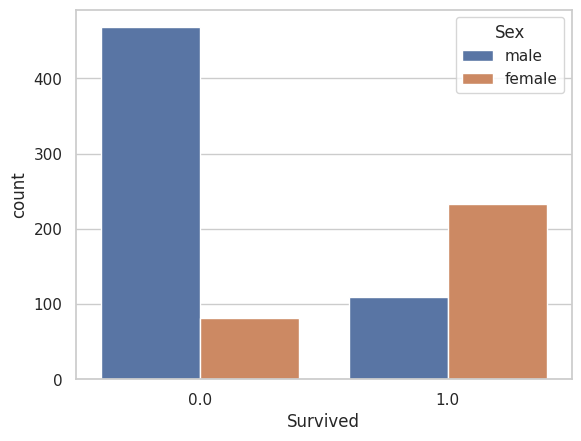

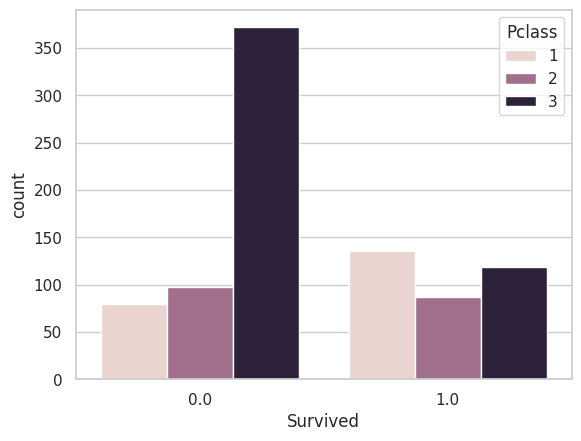

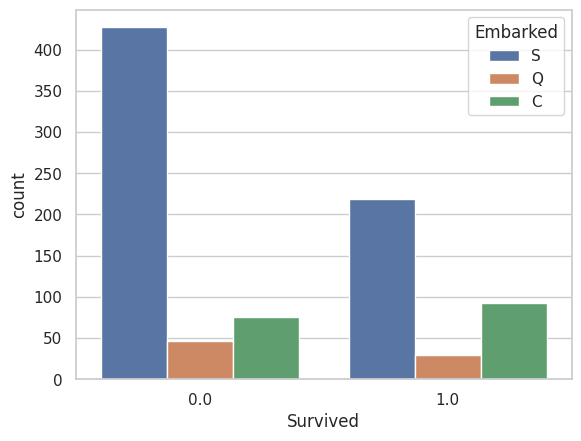

In [13]:
sns.set(style="whitegrid", color_codes=True)

temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    # one_hot_df의 [col_name]컬럼과 y_true를 index 기준으로 병합 (겹치는 인덱스만 병합되어 반환됨)
    temp_df = pd.merge(
        one_hot_df[[col_name]],  # DataFrame 형태로 전달
        y_true, 
        left_index=True, 
        right_index=True
    )

    # Countplot 시각화
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

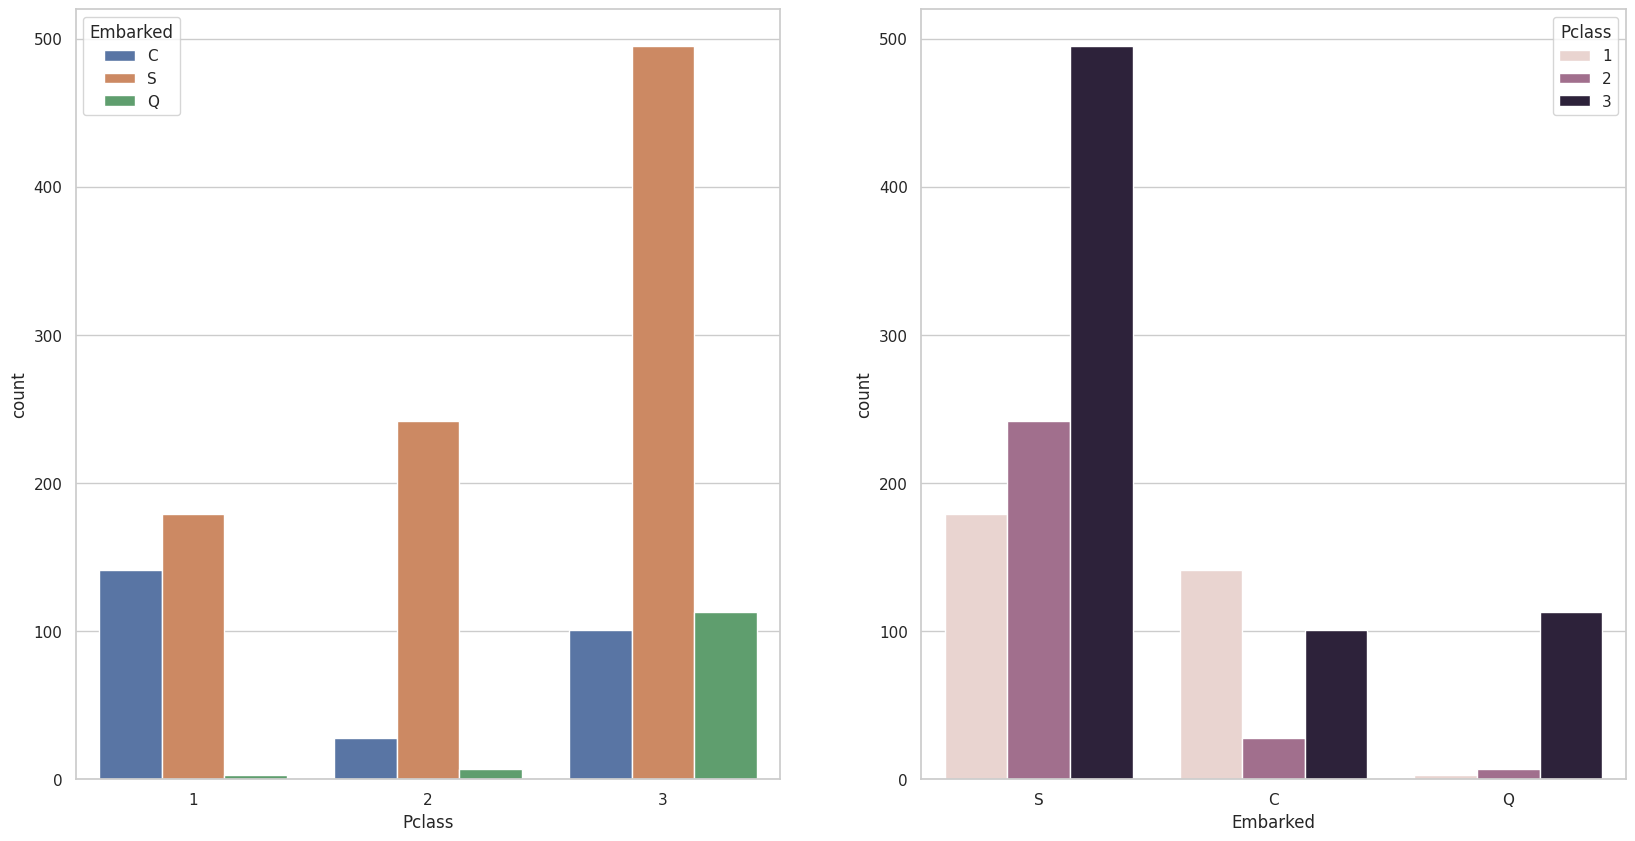

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x="Pclass", hue="Embarked", data=df)
plt.subplot(1,2,2)
sns.countplot(x="Embarked", hue="Pclass", data=df)
plt.show()

### 생존여부에 따른 컬럼별 컬럼수

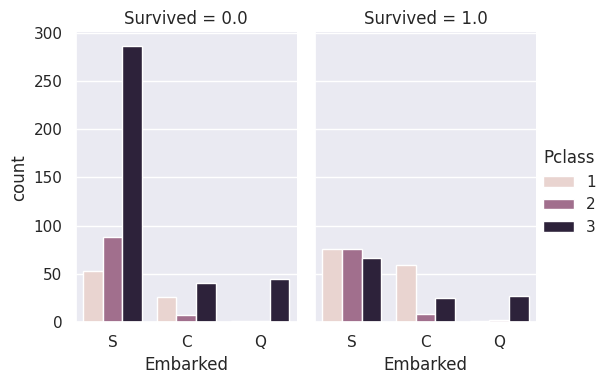

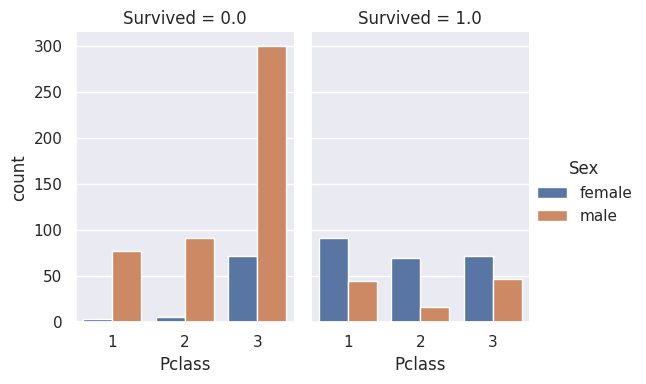

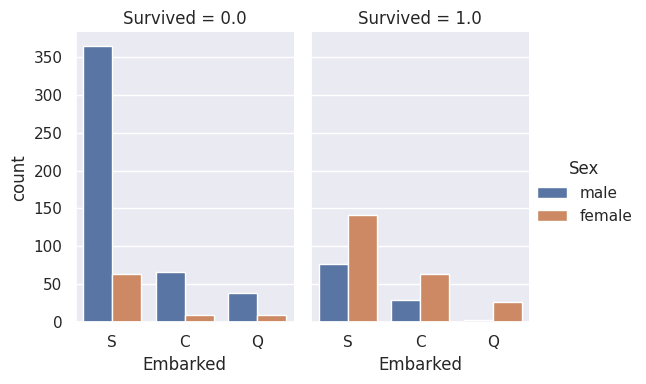

In [ ]:
# one_hot_df에서 분석할 컬럼과 y_true 병합
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, 
    left_index=True, 
    right_index=True
)

# catplot 시각화
def drawCatplot(x,hue):
	sns.catplot(
        x=x,
        hue=hue,
        col="Survived",
        data=temp_df,
        kind="count",
        height=4,
        aspect=0.7
	)
	
drawCatplot("Embarked", "Pclass")
drawCatplot("Pclass", "Sex")
drawCatplot("Embarked", "Sex")


plt.show()


### 5-3. 히트맵으로 상관계수 데이터 시각화

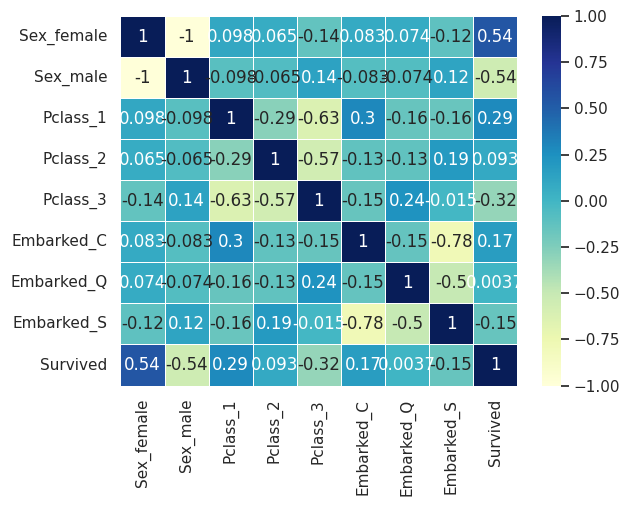

In [ ]:
# temp_columns로부터 crosscheck할 컬럼 선택
crosscheck_columns = [
    col_name
	for col_name in one_hot_df.columns.tolist()
    if col_name.split("_")[0] in temp_columns and "_" in col_name
]

# 선택한 컬럼과 y_true 병합
temp_df = pd.merge(
    one_hot_df[crosscheck_columns],
    y_true,
    left_index=True,
    right_index=True
)

# 상관계수 계산
corr = temp_df.corr()

# 히트맵 시각화
sns.set()
ax = sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    cmap="YlGnBu"
)

plt.show()
